# DRUGBANK File for looking at simplistic target distance #

- using the data_processed/drugbank_processed_combos_syntoxtargallpw_string.csv
- compare distributions of toxicity categories based on average string target distance

In [1]:
# Import everything needed
from matplotlib.patches import Patch
from scipy import stats
from sklearn.metrics import r2_score
from statsmodels.stats.multitest import multipletests
from toxicity_ranking import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import seaborn as sns

In [2]:
drug_syntox_df = pd.read_csv('data_processed/drugbank_processed_combos_syntoxtargallpw_string.csv')
drug_syntox_df

,drug_row,drug_col,cell_line_name,synergy_zip,synergy_loewe,synergy_bliss,synergy_hsa,toxicity_category,avg_short_path_btwn_targets,min_short_path_btwn_targets
0,romidepsin,carfilzomib,EW-8,3.397628,-1.793540,2.087050,1.989756,Major,1.966667,1.0
1,romidepsin,carfilzomib,EW-8,16.630494,0.941715,15.313094,5.341596,Major,1.966667,1.0
2,romidepsin,carfilzomib,EW-8,14.782992,26.427238,26.653928,29.164734,Major,1.966667,1.0
3,gefitinib,prazosin,TC-32,-1.670073,0.485646,2.637166,0.457076,Moderate,2.000000,2.0
4,dasatinib,prazosin,TC-32,4.740410,-3.719839,9.299962,2.919795,Moderate,2.550725,1.0
...,...,...,...,...,...,...,...,...,...,...
73764,saracatinib,olaparib,T24,-1.161702,0.366957,2.440150,3.080191,Major,2.250000,1.0
73765,saracatinib,olaparib,TCCSUP,-9.863271,2.063146,-2.112494,3.888177,Major,2.250000,1.0
73766,saracatinib,olaparib,UM-UC-3,-4.692480,0.339505,2.399012,2.031605,Major,2.250000,1.0
73767,saracatinib,olaparib,VM-CUB-1,-7.821413,-8.084855,-18.212442,-18.532133,Major,2.250000,1.0


(array([3.6400e+02, 6.9000e+01, 2.6100e+03, 3.3630e+03, 5.9730e+03,
        2.6262e+04, 1.2126e+04, 7.1240e+03, 5.4580e+03, 2.8060e+03,
        5.3460e+03, 3.3900e+02, 1.1500e+02, 4.2000e+01, 2.0000e+00,
        8.3000e+01, 8.0000e+00, 6.0000e+00, 2.0000e+00, 5.0000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

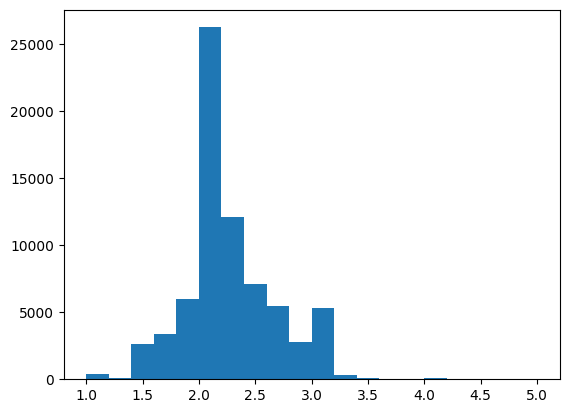

In [3]:
# Look at histogram of target target distances
plt.hist(drug_syntox_df['avg_short_path_btwn_targets'], bins=20)

(array([2.0212e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.6461e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.3350e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

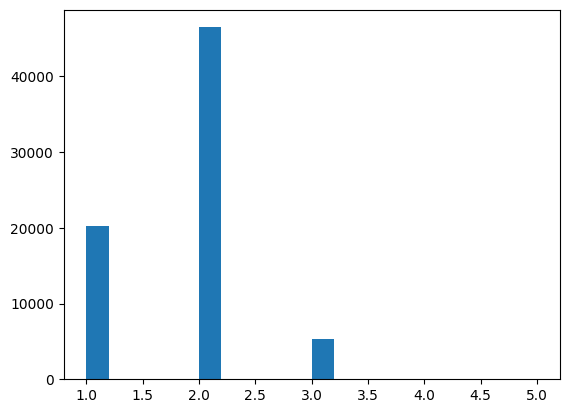

In [4]:
# Look at histogram of pathway target distances
plt.hist(drug_syntox_df['min_short_path_btwn_targets'], bins=20)

- Kruskal Wallis Test
- Dunn Posthoc Test with Bonferroni Correction
- Jonckheere Terpestra Test
- ANOVA
- T Test with Bonferroni Correction

In [5]:
# Run Kruskal Wallis test on average drug target distances with Major, Moderate, and Minor toxicity

# Average target distance
major_target = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']['avg_short_path_btwn_targets'].dropna()
moderate_target = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']['avg_short_path_btwn_targets'].dropna()
minor_target = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']['avg_short_path_btwn_targets'].dropna()
print(f'Major avg target distance: {len(major_target)}')
print(f'Moderate avg target distance: {len(moderate_target)}')
print(f'Minor avg target distance: {len(minor_target)}')

h_statistic_target_tox, p_value_target_tox = stats.kruskal(major_target, moderate_target, minor_target)
print(f'Kruskal-Wallis H statistic for avg target distance: {h_statistic_target_tox}')
print(f'P-value for avg target distance: {p_value_target_tox}')

# Filter drug_syntox_df for only Major, Moderate, and Minor toxicity categories and remove pairs with average target distances of None
drug_syntox_df_tox_target = drug_syntox_df[drug_syntox_df['toxicity_category'].isin(['Major', 'Moderate', 'Minor'])]
drug_syntox_df_tox_target = drug_syntox_df_tox_target[~drug_syntox_df_tox_target['avg_short_path_btwn_targets'].isnull()]
dunn_target_tox = sp.posthoc_dunn(drug_syntox_df_tox_target, val_col='avg_short_path_btwn_targets', group_col='toxicity_category', p_adjust='bonferroni')
print('Dunn post-hoc test for avg target distance:' + str(dunn_target_tox))

# jonkcheere terpestra test -- is there a trend in the average target distance as you increase toxicity from minor to major?
atdist_major_samples = major_target.values.tolist()
atdist_moderate_samples = moderate_target.values.tolist()
atdist_minor_samples = minor_target.values.tolist()
jt_incr_target = jonckheere_terpestra_test([atdist_minor_samples, atdist_moderate_samples, atdist_major_samples])
print(f"Increasing toxicity for avg target distance p value: {jt_incr_target[1]:0.3e}")
jt_decr_target = jonckheere_terpestra_test([atdist_major_samples, atdist_moderate_samples, atdist_minor_samples])
print(f"Decreasing toxicity for avg target distance p value: {jt_decr_target[1]:0.3e}")

# Run an ANOVA on average drug target distances for Major, Moderate, and Minor toxicity categories
f_statistic_anova_target_tox, p_value_anova_target_tox = stats.f_oneway(major_target, moderate_target, minor_target)
print(f'ANOVA F-statistic for avg target distance: {f_statistic_anova_target_tox}')
print(f'P-value for avg target distance: {p_value_anova_target_tox}')

# Run a T test on average drug target distances between Major/Minor, Major/Moderate, and Moderate/Minor toxicity categories
major_minor_target = stats.ttest_ind(major_target, minor_target)
major_moderate_target = stats.ttest_ind(major_target, moderate_target)
moderate_minor_target = stats.ttest_ind(moderate_target, minor_target)

# Run bonferroni correction on the p-values
ttest_p_values = [major_minor_target[1], major_moderate_target[1], moderate_minor_target[1]]
ttest_p_values_corrected = multipletests(ttest_p_values, method='bonferroni')
print(f'Major/Minor T-test: {major_minor_target[1]} Corrected: {ttest_p_values_corrected[1][0]}')
print(f'Major/Moderate T-test: {major_moderate_target[1]} Corrected: {ttest_p_values_corrected[1][1]}')
print(f'Moderate/Minor T-test: {moderate_minor_target[1]} Corrected: {ttest_p_values_corrected[1][2]}')

with open('results/avg_targ_distance_analysis/avg_targ_distance_tox_drugbank.tsv', 'w') as f:
    f.write('Level\tTest\tTest statistic\tP-value\n')
    f.write(f'Target\tKruskal-Wallis\t{h_statistic_target_tox}\t{p_value_target_tox}\n')
    f.write(f'Target\tDunn post-hoc\tMajor/Minor\t{dunn_target_tox.iloc[0, 1]}\n')
    f.write(f'Target\tDunn post-hoc\tMajor/Moderate\t{dunn_target_tox.iloc[0, 2]}\n')
    f.write(f'Target\tDunn post-hoc\tModerate/Minor\t{dunn_target_tox.iloc[1, 2]}\n')
    f.write(f'Target\tJonckheere-Terpstra Increasing toxicity\t{jt_incr_target[0]}\t{jt_incr_target[1]:0.3e}\n')
    f.write(f'Target\tJonckheere-Terpstra Decreasing toxicity\t{jt_decr_target[0]}\t{jt_decr_target[1]:0.3e}\n')
    f.write(f'Target\tANOVA\t{f_statistic_anova_target_tox}\t{p_value_anova_target_tox}\n')
    f.write(f'Target\tT-test (bonf cor)\tMajor/Minor\t{ttest_p_values_corrected[1][0]}\n')
    f.write(f'Target\tT-test (bonf cor)\tMajor/Moderate\t{ttest_p_values_corrected[1][1]}\n')
    f.write(f'Target\tT-test (bonf cor)\tModerate/Minor\t{ttest_p_values_corrected[1][2]}\n')




Major avg target distance: 44022
Moderate avg target distance: 20976
Minor avg target distance: 7105
Kruskal-Wallis H statistic for avg target distance: 5670.661421762943
P-value for avg target distance: 0.0
Dunn post-hoc test for avg target distance:          Major          Minor       Moderate
Major       1.0   0.000000e+00   0.000000e+00
Minor       0.0   1.000000e+00  1.187817e-291
Moderate    0.0  1.187817e-291   1.000000e+00
Increasing toxicity for avg target distance p value: 1.000e+00
Decreasing toxicity for avg target distance p value: 0.000e+00
ANOVA F-statistic for avg target distance: 3770.9839436213115
P-value for avg target distance: 0.0
Major/Minor T-test: 0.0 Corrected: 0.0
Major/Moderate T-test: 0.0 Corrected: 0.0
Moderate/Minor T-test: 4.0391866725924423e-231 Corrected: 1.2117560017777328e-230


- Violin Plot

In [6]:
colors = ['#20965D', '#FFBC42', '#D81159']
tox_order = ['Minor', 'Moderate', 'Major']
color_dict = dict(zip(tox_order, colors))
legend_elements = [
    Patch(facecolor=color_dict[cat], label = cat) for cat in tox_order
]

ax = sns.violinplot(data=drug_syntox_df, x='toxicity_category', y='avg_short_path_btwn_targets', palette=color_dict, hue='toxicity_category', order=tox_order)
ax.set_xlabel('')
ax.set_ylabel('Drug Combination Average Target Distance')
plt.legend(handles=legend_elements, bbox_to_anchor=(0.5,-0.2), loc='center', ncol=3)
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/avgtargdist_v_toxcats_drugbank_violin.png', dpi=700)
plt.close()


- Strip Plot

In [7]:
ax = sns.stripplot(data=drug_syntox_df, x='toxicity_category', y='avg_short_path_btwn_targets', palette=color_dict, hue='toxicity_category', order=tox_order)
ax.set_xlabel('')
ax.set_ylabel('Drug Combination Average Target Distance')
plt.legend(handles=legend_elements, bbox_to_anchor=(0.5,-0.2), loc='center', ncol=3)
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/avgtargdist_v_toxcats_drugbank_strip.png', dpi=700)
plt.close()

- Correlation Scatter Plots (Average Target Distance v Synergy Scores)
- R^2 value
- Best fit line
- Pearson correlation coefficient
- Spearman correlation coefficient

In [8]:
x_avgtargdist = drug_syntox_df['avg_short_path_btwn_targets'].dropna()
y_bliss_true = drug_syntox_df[drug_syntox_df['avg_short_path_btwn_targets'].notna()]['synergy_bliss']
y_loewe_true = drug_syntox_df[drug_syntox_df['avg_short_path_btwn_targets'].notna()]['synergy_loewe']
y_hsa_true = drug_syntox_df[drug_syntox_df['avg_short_path_btwn_targets'].notna()]['synergy_hsa']
y_zip_true = drug_syntox_df[drug_syntox_df['avg_short_path_btwn_targets'].notna()]['synergy_zip']

####### BLISS ########
# Let's plot average STRING target distance against bliss synergy scores
plt.scatter(x_avgtargdist, y_bliss_true)

# Best fit line
z_avgtargdist_bliss = np.polyfit(x_avgtargdist, y_bliss_true, 1)
p_avgtargdist_bliss = np.poly1d(z_avgtargdist_bliss)
y_bliss_pred = p_avgtargdist_bliss(x_avgtargdist)
r_squared_avgtargdist_bliss = r2_score(y_bliss_true, y_bliss_pred)
plt.plot(x_avgtargdist, y_bliss_pred, "r-", alpha=0.8, label=f'y = {z_avgtargdist_bliss[0]:.3f}x + {z_avgtargdist_bliss[1]:.3f}\nR² = {r_squared_avgtargdist_bliss:.3f}')

plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('Bliss Synergy Score')
plt.legend()
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/bliss_v_avgtargdist_drugbank_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between average STRING target distance and bliss synergy score
avgtargdist_bliss_corr = x_avgtargdist.corr(y_bliss_true)
print(f'Pearson correlation coefficient between average target distance and bliss synergy score: {avgtargdist_bliss_corr}')

# Calculate Spearman correlation coefficient between average STRING target distance and bliss synergy score
avgtargdist_bliss_spearman_corr = x_avgtargdist.corr(y_bliss_true, method='spearman')
print(f'Spearman correlation coefficient between average target distance and bliss synergy score: {avgtargdist_bliss_spearman_corr}')

####### HSA ########
# Let's plot average STRING target distance against hsa synergy scores
plt.scatter(x_avgtargdist, y_hsa_true)

# Best fit line
z_avgtargdist_hsa = np.polyfit(x_avgtargdist, y_hsa_true, 1)
p_avgtargdist_hsa = np.poly1d(z_avgtargdist_hsa)
y_hsa_pred = p_avgtargdist_hsa(x_avgtargdist)
r_squared_avgtargdist_hsa = r2_score(y_hsa_true, y_hsa_pred)
plt.plot(x_avgtargdist, y_hsa_pred, "r-", alpha=0.8, label=f'y = {z_avgtargdist_hsa[0]:.3f}x + {z_avgtargdist_hsa[1]:.3f}\nR² = {r_squared_avgtargdist_hsa:.3f}')

plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('HSA Synergy Score')
plt.legend()
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/hsa_v_avgtargdist_drugbank_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between average STRING target distance and hsa synergy score
avgtargdist_hsa_corr = x_avgtargdist.corr(y_hsa_true)
print(f'Pearson correlation coefficient between average target distance and hsa synergy score: {avgtargdist_hsa_corr}')

# Calculate Spearman correlation coefficient between average STRING target distance and hsa synergy score
avgtargdist_hsa_spearman_corr = x_avgtargdist.corr(y_hsa_true, method='spearman')
print(f'Spearman correlation coefficient between average target distance and hsa synergy score: {avgtargdist_hsa_spearman_corr}')

####### LOEWE ########
# Let's plot average STRING target distance against loewe synergy scores
plt.scatter(x_avgtargdist, y_loewe_true)

# Best fit line
z_avgtargdist_loewe = np.polyfit(x_avgtargdist, y_loewe_true, 1)
p_avgtargdist_loewe = np.poly1d(z_avgtargdist_loewe)
y_loewe_pred = p_avgtargdist_loewe(x_avgtargdist)
r_squared_avgtargdist_loewe = r2_score(y_loewe_true, y_loewe_pred)
plt.plot(x_avgtargdist, y_loewe_pred, "r-", alpha=0.8, label=f'y = {z_avgtargdist_loewe[0]:.3f}x + {z_avgtargdist_loewe[1]:.3f}\nR² = {r_squared_avgtargdist_loewe:.3f}')

plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('Loewe Synergy Score')
plt.legend()
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/loewe_v_avgtargdist_drugbank_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between average STRING target distance and loewe synergy score
avgtargdist_loewe_corr = x_avgtargdist.corr(y_loewe_true)
print(f'Pearson correlation coefficient between average target distance and loewe synergy score: {avgtargdist_loewe_corr}')

# Calculate Spearman correlation coefficient between average STRING target distance and loewe synergy score
avgtargdist_loewe_spearman_corr = x_avgtargdist.corr(y_loewe_true, method='spearman')
print(f'Spearman correlation coefficient between average target distance and loewe synergy score: {avgtargdist_loewe_spearman_corr}')

####### ZIP ########
# Let's plot average STRING target distance against zip synergy scores
plt.scatter(x_avgtargdist, y_zip_true)

# Best fit line
z_avgtargdist_zip = np.polyfit(x_avgtargdist, y_zip_true, 1)
p_avgtargdist_zip = np.poly1d(z_avgtargdist_zip)
y_zip_pred = p_avgtargdist_zip(x_avgtargdist)
r_squared_avgtargdist_zip = r2_score(y_zip_true, y_zip_pred)
plt.plot(x_avgtargdist, y_zip_pred, "r-", alpha=0.8, label=f'y = {z_avgtargdist_zip[0]:.3f}x + {z_avgtargdist_zip[1]:.3f}\nR² = {r_squared_avgtargdist_zip:.3f}')

plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('ZIP Synergy Score')
plt.legend()
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/zip_v_avgtargdist_drugbank_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between average STRING target distance and zip synergy score
avgtargdist_zip_corr = x_avgtargdist.corr(y_zip_true)
print(f'Pearson correlation coefficient between average target distance and zip synergy score: {avgtargdist_zip_corr}')

# Calculate Spearman correlation coefficient between average STRING target distance and zip synergy score
avgtargdist_zip_spearman_corr = x_avgtargdist.corr(y_zip_true, method='spearman')
print(f'Spearman correlation coefficient between average target distance and zip synergy score: {avgtargdist_zip_spearman_corr}')

# Write all the correlations and spearman correlations to a file
with open('results/avg_targ_distance_analysis/avgtargdist_v_synergy_correlations_drugbank.tsv', 'w') as f:
    f.write('Synergy score\tLevel\tPearson correlation coefficient\tSpearman correlation\tR squared value\n')
    f.write(f'Bliss\tAverage Target Distance\t{avgtargdist_bliss_corr}\t{avgtargdist_bliss_spearman_corr}\t{r_squared_avgtargdist_bliss}\n')
    f.write(f'HSA\tAverage Target Distance\t{avgtargdist_hsa_corr}\t{avgtargdist_hsa_spearman_corr}\t{r_squared_avgtargdist_hsa}\n')
    f.write(f'Loewe\tAverage Target Distance\t{avgtargdist_loewe_corr}\t{avgtargdist_loewe_spearman_corr}\t{r_squared_avgtargdist_loewe}\n')
    f.write(f'ZIP\tAverage Target Distance\t{avgtargdist_zip_corr}\t{avgtargdist_zip_spearman_corr}\t{r_squared_avgtargdist_zip}\n')

Pearson correlation coefficient between average target distance and bliss synergy score: -0.16137428411703633
Spearman correlation coefficient between average target distance and bliss synergy score: -0.15852845205285254
Pearson correlation coefficient between average target distance and hsa synergy score: -0.05713078543808614
Spearman correlation coefficient between average target distance and hsa synergy score: -0.12953865672570306
Pearson correlation coefficient between average target distance and loewe synergy score: 0.029201023126688472
Spearman correlation coefficient between average target distance and loewe synergy score: -0.022332948048173398
Pearson correlation coefficient between average target distance and zip synergy score: -0.20248361088010725
Spearman correlation coefficient between average target distance and zip synergy score: -0.16913494962096612
